In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/vscode/.cache/pypoetry/virtualenvs/win

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/vscode/.cache/pypoetry/virtualenvs/win

AttributeError: _ARRAY_API not found

In [3]:
# where WellClass located
sys.path.append('../')

In [4]:
# WellClass
from src.WellClass.libs.utils import (
    csv_parser,
    yaml_parser
)
from src.WellClass.libs.well_class import Well
from src.WellClass.libs.well_pressure import Pressure

# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
    plot_pt,
    plot_sketch,
    plot_onepager
)

# Load well CSV or yaml file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [5]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

root_path = '../test_data/examples/wildcat'
root_path = '../test_data/examples/smeaheia_v1'
pvt_path = '../src/WellClass/libs/pvt/pvt_constants'
fluid_type = 'pure_co2'

use_yaml = False

In [6]:
if use_yaml:
    well_case_yaml = r'Simple_well.yaml'
else:
    well_case_csv = r'Simple_well.csv'
    well_case_csv = r'GaP_input_Wildcat_v3.csv'
    well_case_csv = r'GaP_input_Smeaheia_v3.csv'

In [7]:
# load the well information
if use_yaml:

    well_name = os.path.join(root_path, well_case_yaml)

    # # pydantic model
    well_model = yaml_parser(well_name)
    well_csv = json.loads(well_model.spec.model_dump_json())
else:
    well_name = os.path.join(root_path, well_case_csv)
    well_csv = csv_parser(well_name)

In [8]:
!ls -l $well_name

-rwxrwxrwx 1 vscode root 1458 May 12 21:04 ../test_data/examples/smeaheia_v1/GaP_input_Smeaheia_v3.csv


In [45]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
                geology      = well_csv['geology'],
           )

In [72]:
# pressure
my_pressure = Pressure( sf_depth_msl=well_csv['well_header']['sf_depth_msl'],
                        well_td_rkb=well_csv['well_header']['well_td_rkb'],
                        well_rkb=well_csv['well_header']['well_rkb'],
                        sf_temp=well_csv['well_header']['sf_temp'],
                        geo_tgrad=well_csv['well_header']['geo_tgrad'],
                        fluid_type=fluid_type,
                        pvt_path     = pvt_path
                        )

my_pressure.add_scenario(scenario_name='10bar', from_resrvr=True, z_fluid_contact=my_well.co2_datum, p_delta=10)
my_pressure.add_scenario(scenario_name='75bar', from_resrvr=True, z_fluid_contact=my_well.co2_datum, p_delta=100)
my_pressure.add_scenario(scenario_name='-20bar', from_resrvr=True, z_fluid_contact=1285.99, p_delta=-20)
my_pressure.add_scenario(scenario_name='MSAD', from_resrvr=False, z_fluid_contact=1505, z_MSAD=1500)

Computing pressure profile for scenario: 10bar
Computing pressure profile for scenario: 75bar
Computing pressure profile for scenario: -20bar
Lines do not intersect
Computing pressure profile for scenario: MSAD


# Visualization

,name,from_resrvr,z_MSAD,p_MSAD,z_MSAD_brine,p_MSAD_brine,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,10bar,True,657.011034,90.904852,456.907662,56.987331,1282.500000,140.012627,1282.500000,140.012627,10.000000,pure_co2,100% CO2,None
1,75bar,True,1657.628668,260.509541,1657.628665,260.509541,1657.628668,260.509541,1657.628668,260.509541,93.039092,pure_co2,100% CO2,None
2,-20bar,True,361.281563,40.778707,NaN,NaN,1285.990000,110.362037,1285.990000,110.362037,-20.000000,pure_co2,100% CO2,None
3,MSAD,False,1500.000000,233.791482,1498.521294,233.540842,1505.000000,234.189708,1505.000000,234.189708,81.934607,pure_co2,100% CO2,None


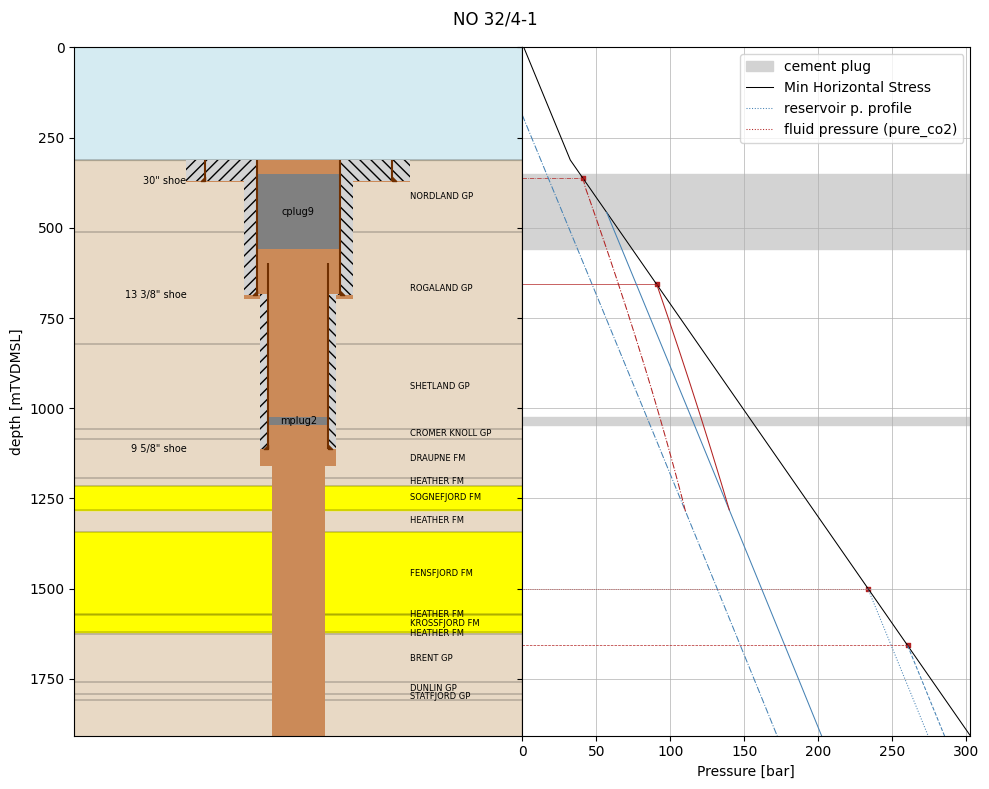

In [73]:
#Plot sketch, pressures
fig, ax = plot_onepager(well = my_well,
                        pressure = my_pressure,
                        width = 10,
                        height = 8,)

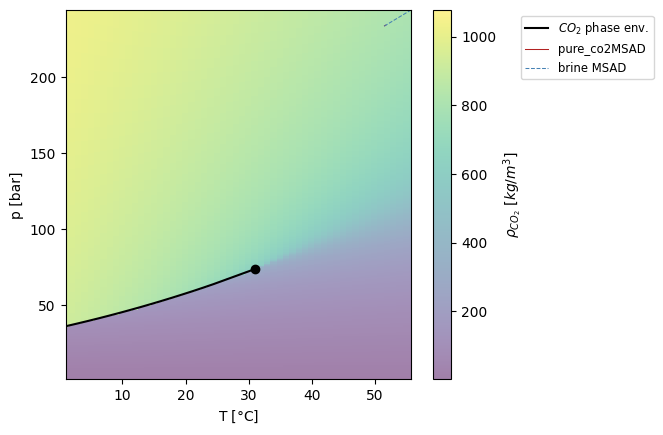

In [11]:
plot_pt(my_pressure)

# CO2 Leakage

In [12]:
print(json.dumps(my_well.barrier_perm, indent=2))

{
  "quality": {
    "0": "good",
    "1": "mid",
    "2": "poor"
  },
  "kv": {
    "0": 0.01,
    "1": 10.0,
    "2": 1000.0
  }
}


In [13]:
# pick one barrier
main_barrier = well_csv['main_barrier']
main_barrier

'cplug9'

In [14]:
# compute its leakage
barrier_leakage = my_pressure.compute_barrier_leakage(my_well, main_barrier)
barrier_leakage

,p_brine_above_barrier,p_fluid_below_barrier,rho_brine_below_barrier,rho_fluid_below_barrier,0.01,10.0,1000.0
MSAD,36.404761,NaN,1027.456485,NaN,NaN,NaN,NaN
